In [1]:
##Attribute Information:
##ID: Customer ID
##Age: Customer's age in completed years
##Experience: #years of professional experience
##Income: Annual income of the customer ($000)
##ZIP Code: Home Address ZIP
##Family: Family size of the customer
##CCAvg: Avg. spending on credit cards per month ($000)
##Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
##Mortgage: Value of house mortgage if any. ($000)
##Personal Loan: Did this customer accept the personal loan offered in the last campaign?
##Securities Account: Does the customer have a securities account with the bank?
##CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
##Online: Does the customer use internet banking facilities?
##Credit card: Does the customer use a credit card issued by the bank?
 



In [2]:
#Steps and tasks:

#1- Import the datasets and libraries, check datatype, statistical summary, shape, null values 
    #or incorrect imputation. (5 marks)
#2- EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
    #Number of unique in each column?
    #Number of people with zero mortgage?
    #Number of people with zero credit card spending per month?
    #Value counts of all categorical columns.
    #Univariate and Bivariate
    #Get data model ready
#3- Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
#4- Use the Logistic Regression model to predict whether the customer will take a personal loan or not. 
    #Print all the metrics related to evaluating the model performance (accuracy, recall, precision, 
    #f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
#5- Find out coefficients of all the attributes and show the output in a data frame with column names? 
#For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
#6- Give conclusion related to the Business understanding of your model? (5 marks)



In [3]:
#1- Import the datasets and libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('/Users/aurelienvallier/Desktop/AI & Machine Learning/CSV Database/Bank_Personal_Loan_Modelling.csv')
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
#check datatype, statistical summary, shape, null values 
    #or incorrect imputation

In [5]:
df.head() # check statistical summary

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.shape # check statistical summary 2

(5000, 14)

In [7]:
df.isnull().values.any() #or incorrect imputation. #there is no null values

False

In [8]:
df.info() # check datatype. #or incorrect imputation. All datas are integer (or float) which seems fine.  Also all label have complete rows (5000) which also seems fine.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
#2- EDA: Study the data distribution in each attribute and target variable, share your findings

In [10]:
 #Number of unique in each columnn?
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [11]:
#Number of people with zero mortgage? #347 people with mortgage form the above uniqueness

In [12]:
#Number of people with zero credit card spending per month?
df.groupby(["CCAvg"]).count() #106 people with 0 credit card spending

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
CCAvg,,,,,,,,,,,,,
0.0,106,106,106,106,106,106,106,106,106,106,106,106,106
0.1,183,183,183,183,183,183,183,183,183,183,183,183,183
0.2,204,204,204,204,204,204,204,204,204,204,204,204,204
0.3,241,241,241,241,241,241,241,241,241,241,241,241,241
0.4,179,179,179,179,179,179,179,179,179,179,179,179,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.8,9,9,9,9,9,9,9,9,9,9,9,9,9
8.9,1,1,1,1,1,1,1,1,1,1,1,1,1
9.0,2,2,2,2,2,2,2,2,2,2,2,2,2


In [13]:
#Value counts of all categorical columns. There are 6 categorical columns: Education, Personal Loan, Securities Account, CD Account, Online, Credit card
df["Education"].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [14]:
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [15]:
df["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [16]:
df["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [17]:
df["Online"].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [18]:
df["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

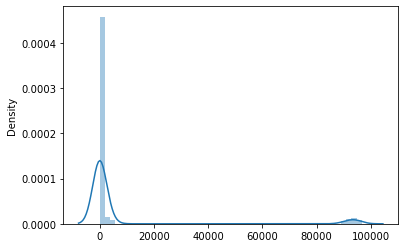

In [19]:
sns.distplot(df)

In [20]:
#Univariate and Bivariate

#Univariate analysis. Target variable is "Personal Loan". Attribute variables are:
#Age, Experience, Income, Family, CCAvg, Education, Mortgage, Securities Account, CD account, Online and Credit Card.
df[df.columns[:]].corr()['Personal Loan'][:]


ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

(array([ 12.,  28.,  53.,  78.,  91., 103., 123., 136.,   0., 125., 120.,
        120., 134., 151., 107., 106.,   0., 115., 133., 125., 136., 126.,
        149., 121.,   0., 127., 127., 113., 118., 115., 138., 129., 145.,
          0., 112., 143., 125., 135., 132., 143., 132.,   0., 127., 122.,
        123., 108.,  78.,  80.,  24.,  12.]),
 array([23.  , 23.88, 24.76, 25.64, 26.52, 27.4 , 28.28, 29.16, 30.04,
        30.92, 31.8 , 32.68, 33.56, 34.44, 35.32, 36.2 , 37.08, 37.96,
        38.84, 39.72, 40.6 , 41.48, 42.36, 43.24, 44.12, 45.  , 45.88,
        46.76, 47.64, 48.52, 49.4 , 50.28, 51.16, 52.04, 52.92, 53.8 ,
        54.68, 55.56, 56.44, 57.32, 58.2 , 59.08, 59.96, 60.84, 61.72,
        62.6 , 63.48, 64.36, 65.24, 66.12, 67.  ]),
 <BarContainer object of 50 artists>)

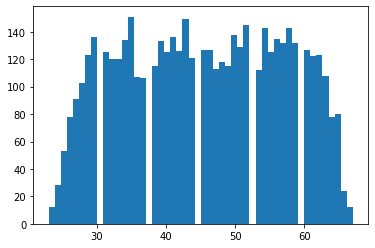

In [21]:
#Univariate analysis. Target variable is "Personal Loan". Attribute variables are:
#Age, Experience, Income, Family, CCAvg, Education, Mortgage, Securities Account, CD account, Online and Credit Card.
# Univariate analysis, of "Age"
df2=df["Age"]
plt.hist(df2, bins=50)

(array([ 784., 1086., 1184., 1164.,  782.]),
 array([-3. ,  6.2, 15.4, 24.6, 33.8, 43. ]),
 <BarContainer object of 5 artists>)

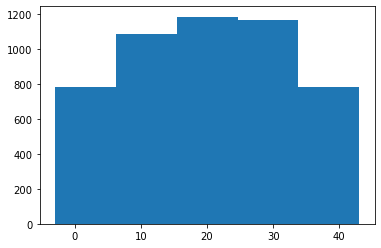

In [22]:
df3=df["Experience"]
plt.hist(df3, bins=5)

(array([129.,  96., 152., 295., 130., 227., 202., 318., 224., 182., 217.,
        108., 270.,  95., 177., 136., 253., 263.,  98., 129.,  53.,  92.,
         40.,  75., 117.,  54.,  74.,  47.,  94.,  38.,  77.,  54.,  42.,
         51.,  44.,  47.,  24.,  47.,  34.,  45.,  54.,  12.,  36.,  26.,
         13.,   7.,   0.,   0.,   1.,   1.]),
 array([  8.  ,  12.32,  16.64,  20.96,  25.28,  29.6 ,  33.92,  38.24,
         42.56,  46.88,  51.2 ,  55.52,  59.84,  64.16,  68.48,  72.8 ,
         77.12,  81.44,  85.76,  90.08,  94.4 ,  98.72, 103.04, 107.36,
        111.68, 116.  , 120.32, 124.64, 128.96, 133.28, 137.6 , 141.92,
        146.24, 150.56, 154.88, 159.2 , 163.52, 167.84, 172.16, 176.48,
        180.8 , 185.12, 189.44, 193.76, 198.08, 202.4 , 206.72, 211.04,
        215.36, 219.68, 224.  ]),
 <BarContainer object of 50 artists>)

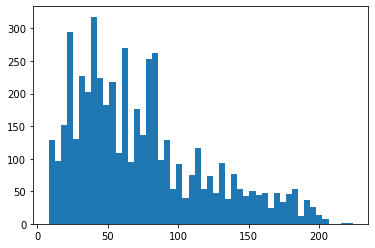

In [23]:
df4=df["Income"]
plt.hist(df4, bins=50)

(array([1472.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1296.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 1010.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 1222.]),
 array([1.  , 1.06, 1.12, 1.18, 1.24, 1.3 , 1.36, 1.42, 1.48, 1.54, 1.6 ,
        1.66, 1.72, 1.78, 1.84, 1.9 , 1.96, 2.02, 2.08, 2.14, 2.2 , 2.26,
        2.32, 2.38, 2.44, 2.5 , 2.56, 2.62, 2.68, 2.74, 2.8 , 2.86, 2.92,
        2.98, 3.04, 3.1 , 3.16, 3.22, 3.28, 3.34, 3.4 , 3.46, 3.52, 3.58,
        3.64, 3.7 , 3.76, 3.82, 3.88, 3.94, 4.  ]),
 <BarContainer object of 50 artists>)

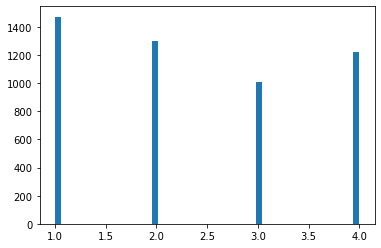

In [24]:
df5=df["Family"]
plt.hist(df5, bins=50)

(array([289., 445., 460., 196., 293., 381., 273., 178., 286., 258., 288.,
        298., 107., 292.,  54.,  73., 108.,  15.,  96.,  27.,  55.,  48.,
         60.,  34.,  22.,  24.,  21.,  29.,  18.,   5.,  40.,  25.,  25.,
         28.,  14.,  14.,  23.,  34.,   9.,   4.,  23.,   2.,   2.,   8.,
         10.,   2.,   1.,   0.,   0.,   3.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <BarContainer object of 50 artists>)

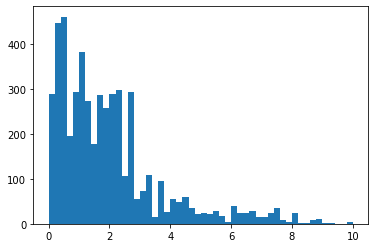

In [25]:
df6=df["CCAvg"]
plt.hist(df6, bins=50)

(array([3.462e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+01,
        1.280e+02, 1.480e+02, 1.450e+02, 1.250e+02, 9.900e+01, 1.010e+02,
        9.100e+01, 6.600e+01, 7.100e+01, 5.400e+01, 5.100e+01, 5.900e+01,
        5.000e+01, 4.000e+01, 2.800e+01, 2.500e+01, 1.900e+01, 2.700e+01,
        2.800e+01, 2.500e+01, 1.400e+01, 1.100e+01, 1.500e+01, 8.000e+00,
        8.000e+00, 1.400e+01, 7.000e+00, 1.100e+01, 6.000e+00, 6.000e+00,
        5.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00]),
 array([  0. ,  12.7,  25.4,  38.1,  50.8,  63.5,  76.2,  88.9, 101.6,
        114.3, 127. , 139.7, 152.4, 165.1, 177.8, 190.5, 203.2, 215.9,
        228.6, 241.3, 254. , 266.7, 279.4, 292.1, 304.8, 317.5, 330.2,
        342.9, 355.6, 368.3, 381. , 393.7, 406.4, 419.1, 431.8, 444.5,
        457.2, 469.9, 482.6, 495.3, 508. , 520.7, 533.4, 546.1, 558.8,
        571.5, 584.2,

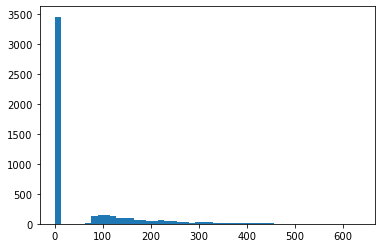

In [26]:
df7=df["Mortgage"]
plt.hist(df7, bins=50)

(array([4478.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  522.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

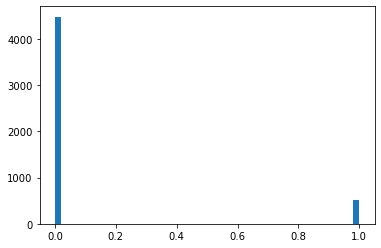

In [27]:
df8=df["Securities Account"]
plt.hist(df8, bins=50)

(array([4698.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  302.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

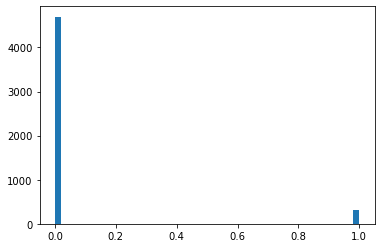

In [28]:
df9=df["CD Account"]
plt.hist(df9, bins=50)

(array([2016.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 2984.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

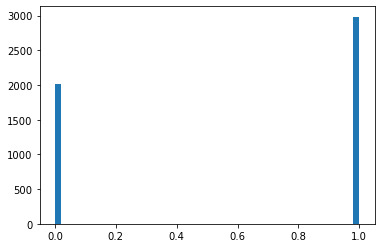

In [29]:
df10=df["Online"]
plt.hist(df10, bins=50)

(array([3530.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 1470.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

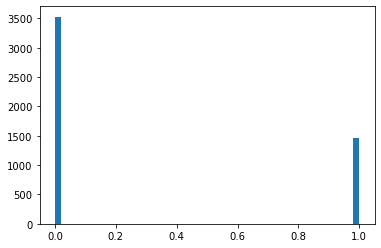

In [30]:
df11=df["CreditCard"]
plt.hist(df11, bins=50)

In [31]:
#Bivariate analysis 

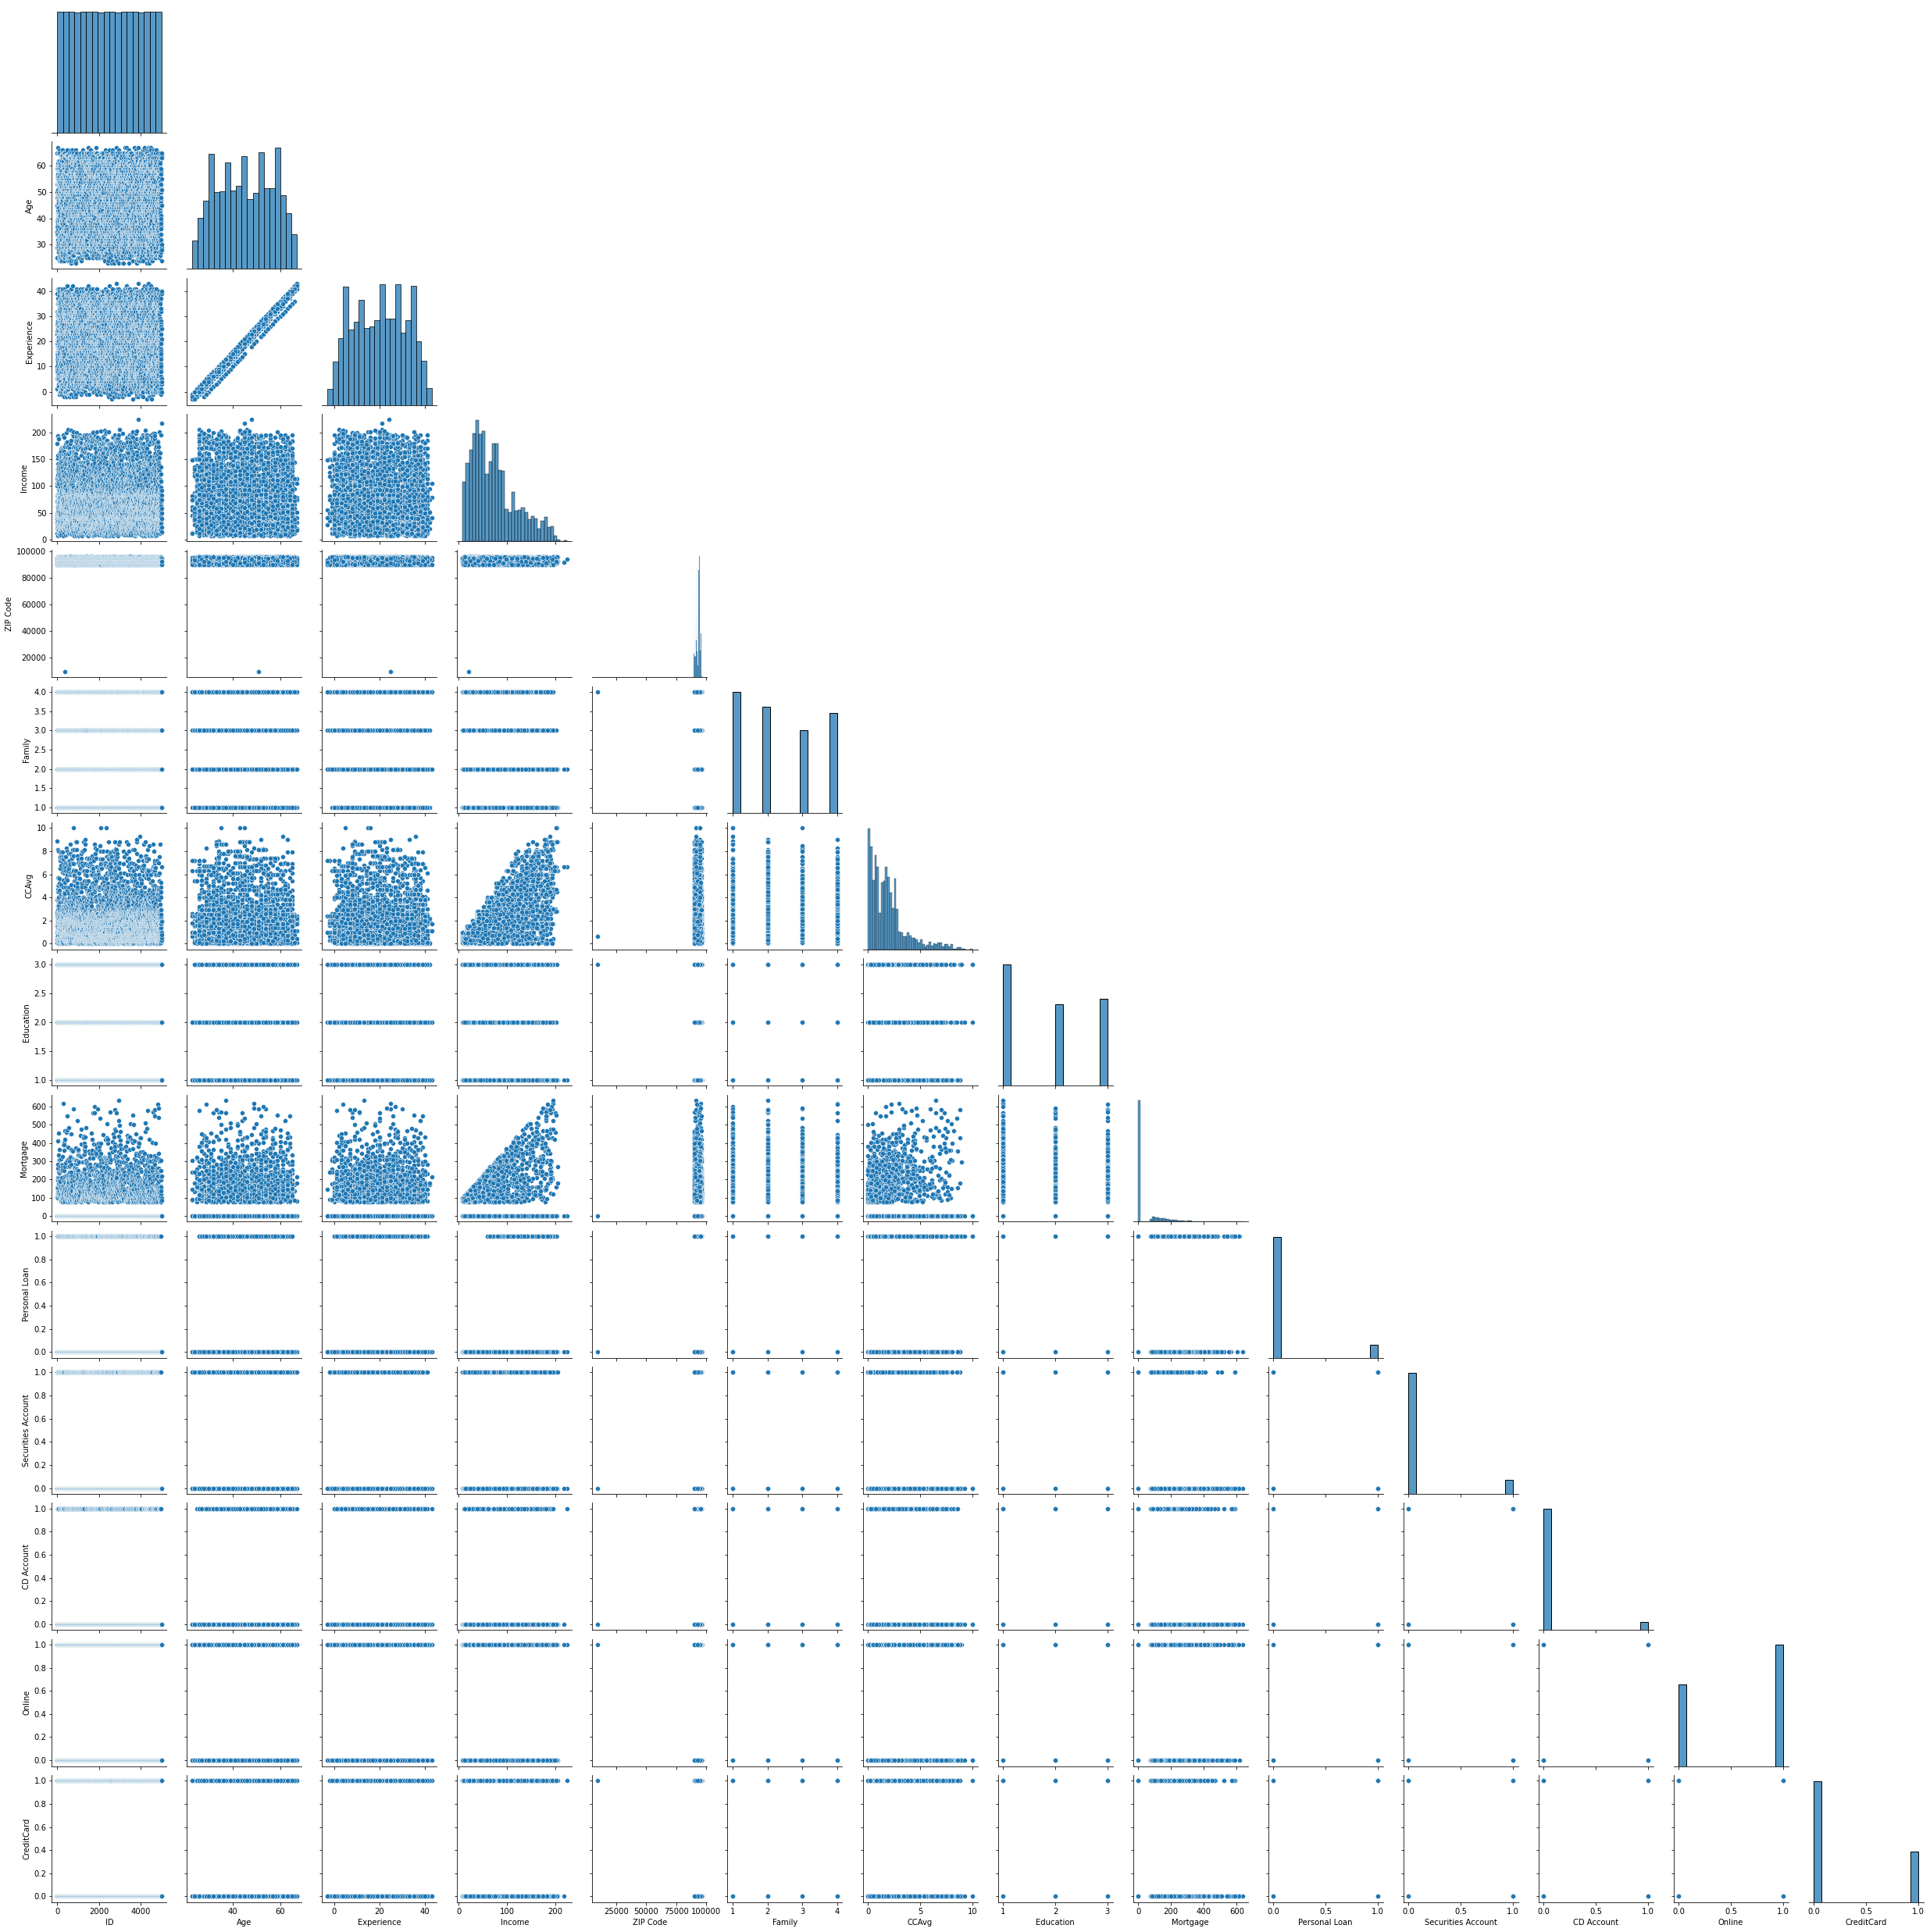

In [32]:
sns.pairplot(df, diag_kind='auto', corner=True) 
plt.show()

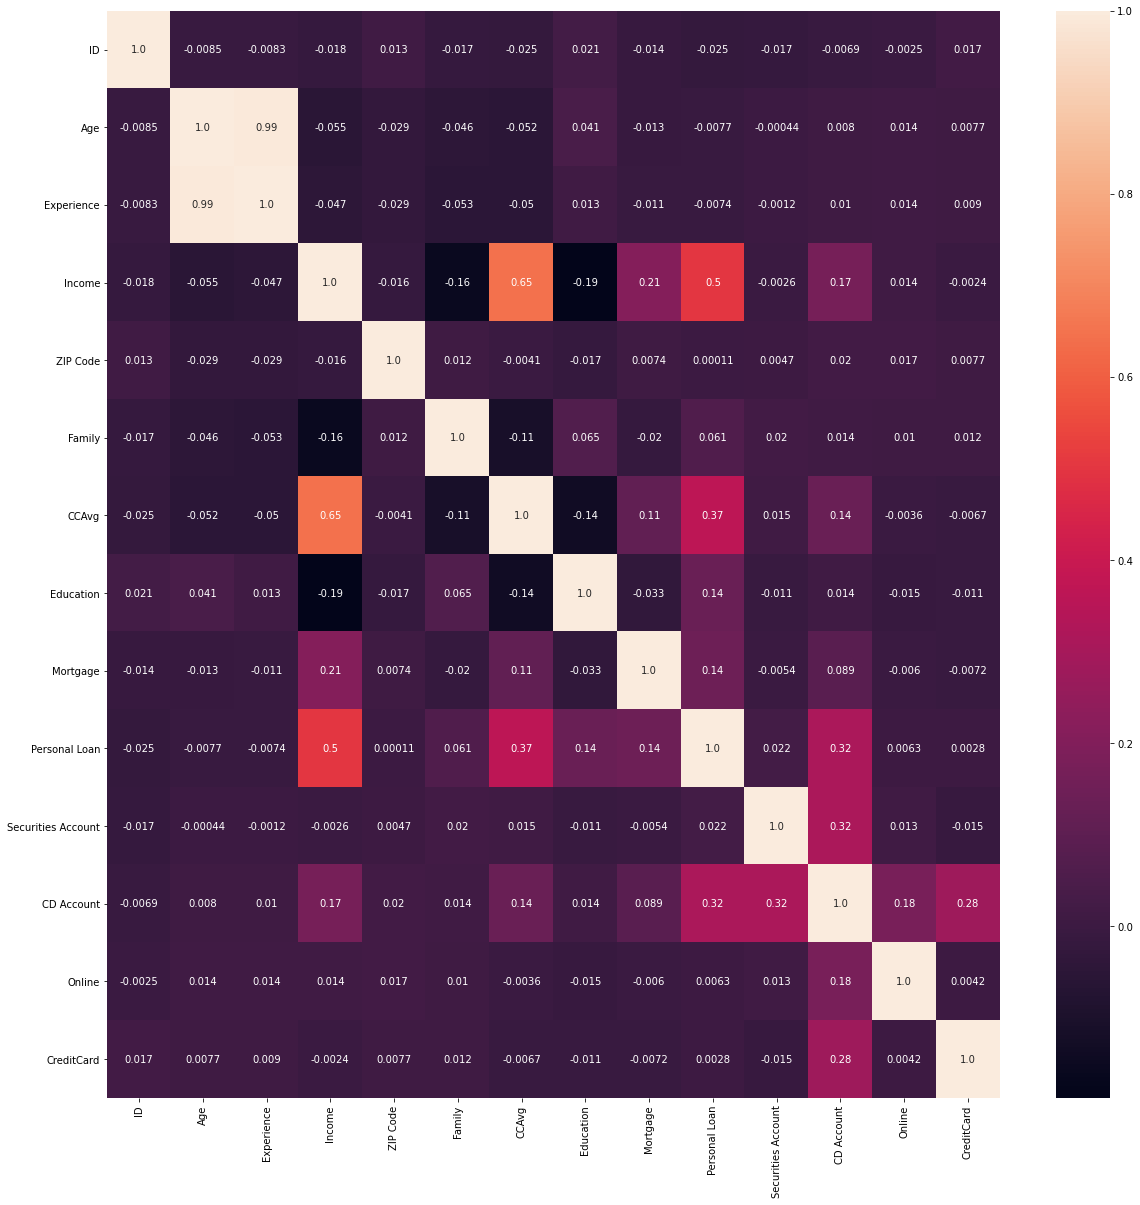

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2")
plt.show()

In [34]:
#Get data model ready
#Objective: The classification goal is to predict the likelihood of a liability customer buying personal loans.
#We thus only consider customer who have existing liability. So we need to check if all 5000 customers
#are indeed liability customer and if not we need to drop a number of clients.
#In addition, we drop irrelevant column for the anaysis
#drop irrelevant column for analysis 
df=df.drop(["ID", "ZIP Code"], axis=1)

In [35]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [36]:
#We thus only consider customer who have existing liability. So we need to check if all 5000 customers
#are indeed liability customer and if not we need to drop a number of clients. #Below table, we see that there 
#are some individuals with no credit card expense, no mortage and no personal loans but there are a limited number
#of them and there is no one having no products at all (i.e. cf account, online or credit card. No one has 0 product 
#at all. So we donot change the data.
df.groupby(["CCAvg", "Mortgage", "Personal Loan"]).sum()

Age  Experience  Income  Family  Education  \
CCAvg Mortgage Personal Loan                                                
0.0   0        0              3505        1621    5844     153        130   
               1                31           7     192       1          2   
      76       0                35           9     179       2          1   
      78       0                47          22      11       2          1   
      85       0                42          17      19       2          3   
...                            ...         ...     ...     ...        ...   
8.9   0        1                34           9     180       1          3   
9.0   0        1                63          33     178       4          3   
      297      1                52          25     180       2          2   
9.3   0        1                61          36     188       1          2   
10.0  0        1               123          36     606       5          8   

                              Securities Account  CD Account  Online  \
CCAvg Mortgage Personal Loan                                           
0.0   0        0                               7           1      49   
               1                               0           0       1   
      76       0                               1           0       1   
      78       0                               0           0       0   
      85       0                               0           0       1   
...                                          ...         ...     ...   
8.9   0        1                               0           0       0   
9.0   0        1                               0           0       0   
      297      1                               0           0       1   
9.3   0        1                               0           0       0   
10.0  0        1                               0           0       0   

                              CreditCard  
CCAvg Mortgage Personal Loan              
0.0   0        0                      22  
               1                       0  
      76       0                       0  
      78       0                       0  
      85       0                       1  
...                                  ...  
8.9   0        1                       0  
9.0   0        1                       0  
      297      1                       0  
9.3   0        1                       0  
10.0  0        1                       1  

[1558 rows x 9 columns]

In [37]:
X = df.drop('Personal Loan', axis=1)
Y = df[['Personal Loan']]

print(X.head())
print(Y.head())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4    1.6          1         0   
1   45          19      34       3    1.5          1         0   
2   39          15      11       1    1.0          1         0   
3   35           9     100       1    2.7          2         0   
4   35           8      45       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  
   Personal Loan
0              0
1              0
2              0
3              0
4              0


In [40]:
print(X.shape)
print(Y.shape)

(5000, 11)
(5000, 1)


In [41]:
#3- Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
X_train.shape

(3500, 11)

In [43]:
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 1334 to 235
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3500 non-null   int64  
 1   Experience          3500 non-null   int64  
 2   Income              3500 non-null   int64  
 3   Family              3500 non-null   int64  
 4   CCAvg               3500 non-null   float64
 5   Education           3500 non-null   int64  
 6   Mortgage            3500 non-null   int64  
 7   Securities Account  3500 non-null   int64  
 8   CD Account          3500 non-null   int64  
 9   Online              3500 non-null   int64  
 10  CreditCard          3500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 328.1 KB


In [45]:
X_test.shape

(1500, 11)

In [46]:
X_test.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2764,31,5,84,1,2.9,3,105,0,0,0,1
4767,35,9,45,3,0.9,1,101,1,0,0,0
3814,34,9,35,3,1.3,1,0,0,0,0,0
3499,49,23,114,1,0.3,1,286,0,0,1,0
2735,36,12,70,3,2.6,2,165,0,0,1,0


In [47]:
#4- Use the Logistic Regression model to predict whether the customer will take a personal loan or not. 
    #Print all the metrics related to evaluating the model performance (accuracy, recall, precision, 
    #f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [48]:
#import model
from sklearn.linear_model import LogisticRegression
#import accuracy, recall, precision, ROC, f1score, confusion matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [49]:
#Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)


/Users/aurelienvallier/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(solver='liblinear')

In [50]:
#Fit the model on test
Y_predict = model.predict(X_test)

In [51]:
model_score = model.score(X_test, Y_test)
print(model_score)

0.9453333333333334


In [52]:
model_score = model.score(X_train, Y_train)
print(model_score)

0.952


In [53]:
recall_score(Y_test,Y_predict)

0.5704697986577181

In [54]:
roc_auc_score(Y_test,Y_predict)

0.778573167278526

In [55]:
f1_score(Y_test,Y_predict)

0.6746031746031745

In [56]:
accuracy_score(Y_test,Y_predict)

0.9453333333333334

In [57]:
precision_score(Y_test,Y_predict)

0.8252427184466019

<AxesSubplot:>

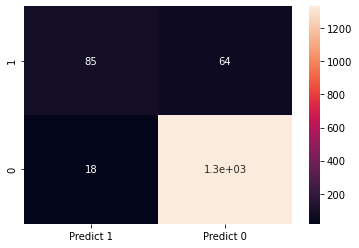

In [58]:
cm=confusion_matrix(Y_test, Y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm, annot=True)





The confusion matrix

True Positives (TP): we correctly predicted that they will take a loan 85

True Negatives (TN): we correctly predicted that they will not take a loan 1333

False Positives (FP): we incorrectly predicted that they will take a loan (a "Type I error") 18 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they wil not take a loan (a "Type II error") 64 Falsely predict negative Type II error



In [59]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.57      0.67       149

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



In [60]:
#5- Find out coefficients of all the attributes and show the output in a data frame with column names? 
#For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [80]:
#we use the function .coef_ together with logistic regression model ("model")
# and use it to create a dataframe called #coefdf

### Feature Importance or Coefficients 
coefdf = pd.DataFrame()
coefdf['Column'] = X_train.columns
coefdf['Coeff'] = np.round(abs(model.coef_[0]),2)
coefdf.sort_values(by='Coeff',ascending=False)

,Column,Coeff
8,CD Account,3.26
5,Education,1.66
10,CreditCard,1.01
7,Securities Account,0.91
3,Family,0.65
9,Online,0.58
0,Age,0.41
1,Experience,0.40
4,CCAvg,0.16
2,Income,0.05


In [81]:
X_test.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [65]:
#For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [66]:
X_test.describe

<bound method NDFrame.describe of       Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
2764   31           5      84       1   2.90          3       105   
4767   35           9      45       3   0.90          1       101   
3814   34           9      35       3   1.30          1         0   
3499   49          23     114       1   0.30          1       286   
2735   36          12      70       3   2.60          2       165   
...   ...         ...     ...     ...    ...        ...       ...   
4140   63          38      32       1   1.50          2         0   
3969   38          11      75       3   2.33          2         0   
2535   50          25      21       2   0.70          3       129   
1361   50          26      38       4   0.90          2         0   
1458   51          25      33       1   1.40          3         0   

      Securities Account  CD Account  Online  CreditCard  
2764                   0           0       0           1  
4767               

In [67]:
# Observe the predicted and observed classes in a dataframe.
z = X_test.copy()
z['Observed New Loan Acceptance'] = Y_test
z['Predicted New Loan Acceptance'] = Y_predict
z.head(20)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed New Loan Acceptance,Predicted New Loan Acceptance
2764,31,5,84,1,2.90,3,105,0,0,0,1,0,0
4767,35,9,45,3,0.90,1,101,1,0,0,0,0,0
3814,34,9,35,3,1.30,1,0,0,0,0,0,0,0
3499,49,23,114,1,0.30,1,286,0,0,1,0,0,0
2735,36,12,70,3,2.60,2,165,0,0,1,0,0,0
3922,31,4,20,4,1.50,2,0,0,0,1,0,0,0
2701,50,26,55,1,1.60,2,0,0,0,1,0,0,0
1179,36,11,98,3,1.20,3,0,1,0,0,1,0,0
932,51,27,112,3,1.80,2,0,1,1,1,1,0,0
792,41,16,98,1,4.00,3,0,0,0,0,1,0,0


In [70]:
z["False or True Prediction"]=z['Predicted New Loan Acceptance']!=(z['Observed New Loan Acceptance'])
z

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed New Loan Acceptance,Predicted New Loan Acceptance,False or True Prediction
2764,31,5,84,1,2.90,3,105,0,0,0,1,0,0,False
4767,35,9,45,3,0.90,1,101,1,0,0,0,0,0,False
3814,34,9,35,3,1.30,1,0,0,0,0,0,0,0,False
3499,49,23,114,1,0.30,1,286,0,0,1,0,0,0,False
2735,36,12,70,3,2.60,2,165,0,0,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,63,38,32,1,1.50,2,0,0,0,0,0,0,0,False
3969,38,11,75,3,2.33,2,0,0,0,1,0,0,0,False
2535,50,25,21,2,0.70,3,129,0,0,0,0,0,0,False
1361,50,26,38,4,0.90,2,0,0,0,1,0,0,0,False


In [73]:
z.drop( z[ z['False or True Prediction'] == False ].index, inplace=True)

In [74]:
z

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed New Loan Acceptance,Predicted New Loan Acceptance,False or True Prediction
1513,45,21,183,2,1.4,1,354,0,0,0,0,0,1,True
3347,65,41,78,3,2.0,3,0,0,1,1,1,0,1,True
3271,52,27,93,4,4.1,2,0,0,0,0,1,1,0,True
349,26,2,60,2,3.0,1,132,0,0,0,0,1,0,True
927,65,40,95,3,3.7,2,138,0,0,0,1,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,35,9,113,3,0.8,3,0,0,0,1,0,1,0,True
813,50,25,130,1,1.1,2,0,0,0,1,0,1,0,True
3766,59,35,108,4,3.8,2,304,0,0,1,0,1,0,True
421,28,3,115,4,3.1,2,0,0,0,0,0,1,0,True


Those are all the rows where the predicted class is not equal to the observed class

In [ ]:
#6- Give conclusion related to the Business understanding of your model? (5 marks)


Confusion matrix: 

True Positive :
Predicted that customer will take personal loan and customer indeed took it
False Positive:
Predicted that customer will take personal loan and customer in fact did not take it
True Negative :
Predicted that customer will not take personal loan and customer did not
False Negative :
Predicted that customer will not take personal loan and customer did

Based on the coefficient value, the top 5 features that influence the output based on coefficient is "CD Account", "Education", "CreditCard", "Securities Account" and "Family"

A number of features have a close to 0 coefficient and have limited impact (= credit card, mortage, experience, age, income).

The Bank should make sure it does not miss reaching out to the customers having those top 5 features. 

As cost of compaign is widely spread among a large number of targeted customers, there is relarively limited financial negative impact of False Positive. Being an optimist banker is no big harm. 

However it is important for the Bank not to miss out on opportunity to find a new loan client as there is a significant upside every time a client takes a loan. The main financial risk is having many False negative and missing out on those clients or having a True positive rate too low

Since achieving high rate of True Positive and keeping False Negative as low as possible are the important metrics, a balance between recall and precision is good. F-1 Score can thus be used. Then the bank can focus on a appropriate commercial strategy accordinfly.
